In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dev-o-thon-23/Rain.csv
/kaggle/input/dev-o-thon-23/EST.csv


In [2]:
rain_df=pd.read_csv("/kaggle/input/dev-o-thon-23/Rain.csv")
est_df=pd.read_csv("/kaggle/input/dev-o-thon-23/EST.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
rain_df.head(10)

,Unnamed: 0,Unnamed: 0.1,Email,Leads_Source,Work email,Job title,Sales owner,Owner Email,Territory,Team,...,Shipping,Total,Discount Amount,Payment Method,Refunded Amount,Vendor,Outstanding Balance,Source,Status,ID
0,0,198598,gioe.sravan4895@mail.ru,Web,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5c9af089-4276-44d6-a7c5-37a5130a6d32
1,1,188345,bosakprem4895@mail.ru,Web,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,f79a6c78-a825-4f9c-951c-c4d5328a191a
2,2,148798,anshumankumar9584895@mail.ru,Web,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17c705fe-a3b3-4c8d-be86-22eb494ef1f3
3,3,78181,prasadgotteti24895@mail.ru,Shopify,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,17235.0,9139.0,manual,0.0,J&J Leaping,0.0,shopify_draft_order,1,8c0e56f9-9d48-4a40-bbbd-017974075927
4,4,158346,nutrition22chd4895@mail.ru,Web,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1b516685-c8a3-45be-8e70-f788b2d7577d
5,5,159311,satyam88954895@mail.ru,Web,NaN,NaN,Santosh Kumar,santosh.kumar4@J&J47.COM,D2C WP Sales - All,J&j_crto_AC_Sales_Team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,d5b789a7-b317-436c-8cb6-499b4b456616
6,6,135224,contactshakil184895@mail.ru,Web,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4091685e-ac14-4a00-a4bb-c6131b4bc83b
7,7,176075,rahulvarkderahulvarkde4895@mail.ru,Web,NaN,NaN,Gaurav Yadav,gaurav.yadav2@J&J47.COM,D2C WP Sales - All,J&j_crto_AC_Sales_Team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,e1ff12a9-f5d1-4631-ac85-b18e93ae4742
8,8,188316,ksubrat7634895@mail.ru,Web,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8cde00f3-707e-41de-8b4e-add5269807a8
9,9,187201,gopalkrishna829404895@mail.ru,Web,NaN,NaN,Mohd Adil,mohd.adil@J&J47.COM,NaN,LSH Sales Team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,bdf80398-a92f-4f0b-a113-48e9bb13810e


In [4]:
rain_df.describe()

,Unnamed: 0,Unnamed: 0.1,Work email,Job title,Accepts Marketing,Shipping,Total,Discount Amount,Refunded Amount,Outstanding Balance,Status
count,149032.000000,149032.000000,1.0,0.0,21720.000000,21720.000000,2.172000e+04,2.172000e+04,21720.000000,2.172000e+04,149032.000000
mean,74515.500000,106384.056424,0.0,NaN,0.574908,22.215554,3.022193e+04,2.619813e+03,1.919896,2.161931e+04,0.174889
std,43021.976996,61517.822101,NaN,NaN,0.494368,372.570069,2.543728e+05,1.218538e+04,105.163026,2.752161e+05,0.379873
min,0.000000,2.000000,0.0,NaN,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-2.199000e+03,0.000000
25%,37257.750000,52990.750000,0.0,NaN,0.000000,0.000000,1.349100e+03,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,74515.500000,106403.500000,0.0,NaN,1.000000,0.000000,4.779550e+03,2.649500e+02,0.000000,0.000000e+00,0.000000
75%,111773.250000,159647.250000,0.0,NaN,1.000000,0.000000,1.301900e+04,2.233000e+03,0.000000,2.298000e+03,0.000000
max,149031.000000,212903.000000,0.0,NaN,1.000000,26498.000000,2.249850e+07,1.328498e+06,11609.000000,2.498498e+07,1.000000


In [5]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149032 entries, 0 to 149031
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            149032 non-null  int64  
 1   Unnamed: 0.1          149032 non-null  int64  
 2   Email                 144673 non-null  object 
 3   Leads_Source          149032 non-null  object 
 4   Work email            1 non-null       float64
 5   Job title             0 non-null       float64
 6   Sales owner           60435 non-null   object 
 7   Owner Email           60435 non-null   object 
 8   Territory             8056 non-null    object 
 9   Team                  60311 non-null   object 
 10  Pcrtoduct_interested  31642 non-null   object 
 11  Lead_Zipcode          99933 non-null   object 
 12  Lead_State            99195 non-null   object 
 13  Lead_city             100793 non-null  object 
 14  url-campaign          2 non-null       object 
 15  

In [6]:
rain_df.isnull().sum()

Unnamed: 0                   0
Unnamed: 0.1                 0
Email                     4359
Leads_Source                 0
Work email              149031
Job title               149032
Sales owner              88597
Owner Email              88597
Territory               140976
Team                     88721
Pcrtoduct_interested    117390
Lead_Zipcode             49099
Lead_State               49837
Lead_city                48239
url-campaign            149030
page-url                133638
Lead_hour                    0
Fulfillment Status      127312
Fulfilled at            128888
Accepts Marketing       127312
Shipping                127312
Total                   127312
Discount Amount         127312
Payment Method          127353
Refunded Amount         127312
Vendor                  122975
Outstanding Balance     127312
Source                  127312
Status                       0
ID                           0
dtype: int64

In [7]:
# # select the columns you want to find the correlation for
# columns = ['Accepts Marketing', 'Shipping', 'Total', 'Discount Amount', 
#            'Payment Method', 'Refunded Amount', 'Vendor', 'Outstanding Balance', 'Source']

# # create a correlation matrix using the corr() method
# correlation_matrix = rain_df[columns].corr()

# # print the correlation matrix
# print(correlation_matrix)

# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.show()

In [8]:
df = rain_df.copy()

In [9]:
for col in rain_df.columns:
    print(col)
    print(df[col].nunique())

Unnamed: 0
149032
Unnamed: 0.1
149032
Email
137321
Leads_Source
17
Work email
1
Job title
0
Sales owner
54
Owner Email
56
Territory
17
Team
3
Pcrtoduct_interested
99
Lead_Zipcode
8286
Lead_State
173
Lead_city
7652
url-campaign
2
page-url
6413
Lead_hour
102490
Fulfillment Status
3
Fulfilled at
20103
Accepts Marketing
2
Shipping
31
Total
4204
Discount Amount
3385
Payment Method
19
Refunded Amount
14
Vendor
2
Outstanding Balance
2636
Source
11
Status
2
ID
149032


In [10]:
print(rain_df.shape)

(149032, 30)


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df.isnull().sum()

Unnamed: 0                   0
Unnamed: 0.1                 0
Email                     4359
Leads_Source                 0
Work email              149031
Job title               149032
Sales owner              88597
Owner Email              88597
Territory               140976
Team                     88721
Pcrtoduct_interested    117390
Lead_Zipcode             49099
Lead_State               49837
Lead_city                48239
url-campaign            149030
page-url                133638
Lead_hour                    0
Fulfillment Status      127312
Fulfilled at            128888
Accepts Marketing       127312
Shipping                127312
Total                   127312
Discount Amount         127312
Payment Method          127353
Refunded Amount         127312
Vendor                  122975
Outstanding Balance     127312
Source                  127312
Status                       0
ID                           0
dtype: int64

In [13]:
df_drop = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Work email', 'Job title', 'Owner Email', 'Lead_Zipcode', 'Territory', 'Fulfillment Status', 'Fulfilled at', 'Shipping', 'ID', 'Payment Method', 'Refunded Amount', 'url-campaign'], axis=1)

In [14]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149032 entries, 0 to 149031
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Email                 144673 non-null  object 
 1   Leads_Source          149032 non-null  object 
 2   Sales owner           60435 non-null   object 
 3   Team                  60311 non-null   object 
 4   Pcrtoduct_interested  31642 non-null   object 
 5   Lead_State            99195 non-null   object 
 6   Lead_city             100793 non-null  object 
 7   page-url              15394 non-null   object 
 8   Lead_hour             149032 non-null  object 
 9   Accepts Marketing     21720 non-null   float64
 10  Total                 21720 non-null   float64
 11  Discount Amount       21720 non-null   float64
 12  Vendor                26057 non-null   object 
 13  Outstanding Balance   21720 non-null   float64
 14  Source                21720 non-null   object 
 15  

In [15]:
df_drop.isnull().sum()


Email                     4359
Leads_Source                 0
Sales owner              88597
Team                     88721
Pcrtoduct_interested    117390
Lead_State               49837
Lead_city                48239
page-url                133638
Lead_hour                    0
Accepts Marketing       127312
Total                   127312
Discount Amount         127312
Vendor                  122975
Outstanding Balance     127312
Source                  127312
Status                       0
dtype: int64

In [16]:
for col in df_drop.columns:
    print(col)
    print(df_drop[col].nunique())

Email
137321
Leads_Source
17
Sales owner
54
Team
3
Pcrtoduct_interested
99
Lead_State
173
Lead_city
7652
page-url
6413
Lead_hour
102490
Accepts Marketing
2
Total
4204
Discount Amount
3385
Vendor
2
Outstanding Balance
2636
Source
11
Status
2


In [17]:
df_drop.describe()

,Accepts Marketing,Total,Discount Amount,Outstanding Balance,Status
count,21720.000000,2.172000e+04,2.172000e+04,2.172000e+04,149032.000000
mean,0.574908,3.022193e+04,2.619813e+03,2.161931e+04,0.174889
std,0.494368,2.543728e+05,1.218538e+04,2.752161e+05,0.379873
min,0.000000,0.000000e+00,0.000000e+00,-2.199000e+03,0.000000
25%,0.000000,1.349100e+03,0.000000e+00,0.000000e+00,0.000000
50%,1.000000,4.779550e+03,2.649500e+02,0.000000e+00,0.000000
75%,1.000000,1.301900e+04,2.233000e+03,2.298000e+03,0.000000
max,1.000000,2.249850e+07,1.328498e+06,2.498498e+07,1.000000


In [18]:
# dropping rows where the following columns are na

# df_drop.dropna(subset=['Email', 'Leads_Source', 'Sales owner', 'Lead_State', 'Lead_city'], inplace=True)

In [19]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149032 entries, 0 to 149031
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Email                 144673 non-null  object 
 1   Leads_Source          149032 non-null  object 
 2   Sales owner           60435 non-null   object 
 3   Team                  60311 non-null   object 
 4   Pcrtoduct_interested  31642 non-null   object 
 5   Lead_State            99195 non-null   object 
 6   Lead_city             100793 non-null  object 
 7   page-url              15394 non-null   object 
 8   Lead_hour             149032 non-null  object 
 9   Accepts Marketing     21720 non-null   float64
 10  Total                 21720 non-null   float64
 11  Discount Amount       21720 non-null   float64
 12  Vendor                26057 non-null   object 
 13  Outstanding Balance   21720 non-null   float64
 14  Source                21720 non-null   object 
 15  

In [20]:
# Dropping rows wih NaN
df_final = df_drop.dropna()

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 586 to 147693
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 394 non-null    object 
 1   Leads_Source          394 non-null    object 
 2   Sales owner           394 non-null    object 
 3   Team                  394 non-null    object 
 4   Pcrtoduct_interested  394 non-null    object 
 5   Lead_State            394 non-null    object 
 6   Lead_city             394 non-null    object 
 7   page-url              394 non-null    object 
 8   Lead_hour             394 non-null    object 
 9   Accepts Marketing     394 non-null    float64
 10  Total                 394 non-null    float64
 11  Discount Amount       394 non-null    float64
 12  Vendor                394 non-null    object 
 13  Outstanding Balance   394 non-null    float64
 14  Source                394 non-null    object 
 15  Status            

In [22]:
df_final.head()

,Email,Leads_Source,Sales owner,Team,Pcrtoduct_interested,Lead_State,Lead_city,page-url,Lead_hour,Accepts Marketing,Total,Discount Amount,Vendor,Outstanding Balance,Source,Status
586,venkatramct74895@mail.ru,Shopify,Mrinmoy Mahara,J&j_crto_AC_Sales_Team,Buy Water Purifier,Karnataka,Bengaluru,https://J&j.com/pcrtoducts/glitz-water-purifie...,44978.77729,1.0,73498.0,690.0,J&J,0.0,2328723457,1
605,mukeshkumar2519774895@mail.ru,Shopify,Abdul Sattar,LSH Sales Team,"Buy M.A.T.T.,M.A.T.T.",Delhi,Delhi,https://J&j.com/collections/home-living,44739.89674,1.0,1798.0,0.0,J&J Leaping,0.0,web,1
1736,srineeth104895@mail.ru,Shopify,Kunal Khera,J&j_crto_AC_Sales_Team,Buy Water Purifier,Andhra Pradesh,SRIKAKULAM,https://J&j.com/pcrtoducts/bolt-crto?utm_mediu...,44974.89535,1.0,141498.0,890.0,J&J,0.0,shopify_draft_order,1
1886,lavanyamp143amma4895@mail.ru,Shopify,Ashwin Nair,LSH_YOLO Team,M.A.T.T.,Karnataka,Tumkur,https://www.J&jLeaping.com/pcrtoducts/all-weat...,44652.95924,0.0,14308.1,1489.9,J&J,13808.1,pos,1
2155,mathewsta@hotmail.com,Shopify,Ashwin Nair,LSH_YOLO Team,"M.A.T.T.,Buy M.A.T.T.",Punjab,LUDHIANA,https://J&j.com/pages/J&j-brand-offers-1,44739.72799,1.0,1423.1,74.9,J&J Leaping,1423.1,shopify_draft_order,1


# SOME EDA

                     Accepts Marketing     Total  Discount Amount  \
Accepts Marketing             1.000000 -0.067020        -0.090857   
Total                        -0.067020  1.000000         0.129140   
Discount Amount              -0.090857  0.129140         1.000000   
Outstanding Balance          -0.067980  0.452117         0.050784   
Status                             NaN       NaN              NaN   

                     Outstanding Balance  Status  
Accepts Marketing              -0.067980     NaN  
Total                           0.452117     NaN  
Discount Amount                 0.050784     NaN  
Outstanding Balance             1.000000     NaN  
Status                               NaN     1.0  


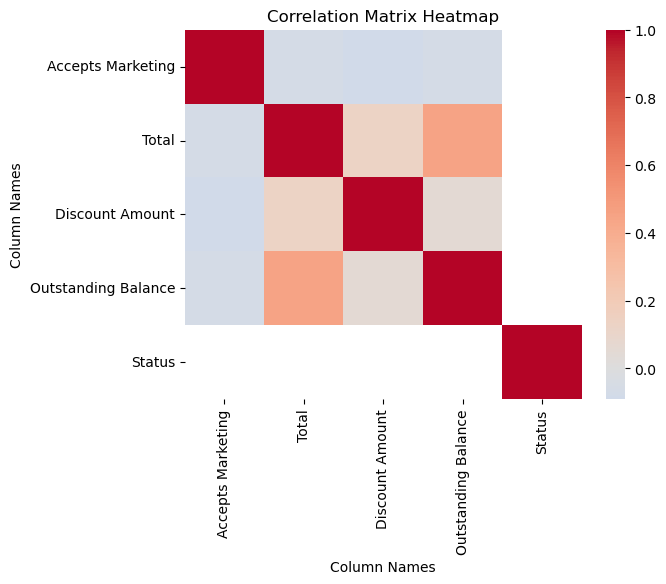

In [23]:
corr = df_drop.corr()
print(corr)

# Create the heatmap
sns.heatmap(corr, cmap='coolwarm', center=0)

# Add title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Column Names')
plt.ylabel('Column Names')

# Display the plot
plt.show()

In [24]:
# Separating numerical and categorical features
df_num = df_drop.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_cat = df_drop.select_dtypes(include=['object']).columns.tolist()

# Printing the list of numerical and categorical features
print('Numerical features:', df_num)
print('Categorical features:', df_cat)

Numerical features: ['Accepts Marketing', 'Total', 'Discount Amount', 'Outstanding Balance', 'Status']
Categorical features: ['Email', 'Leads_Source', 'Sales owner', 'Team', 'Pcrtoduct_interested', 'Lead_State', 'Lead_city', 'page-url', 'Lead_hour', 'Vendor', 'Source']


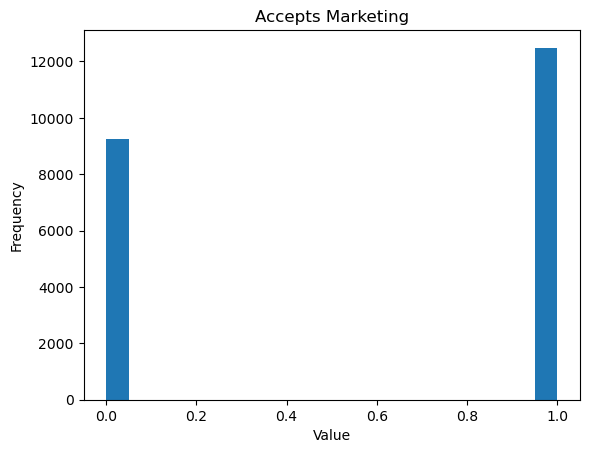

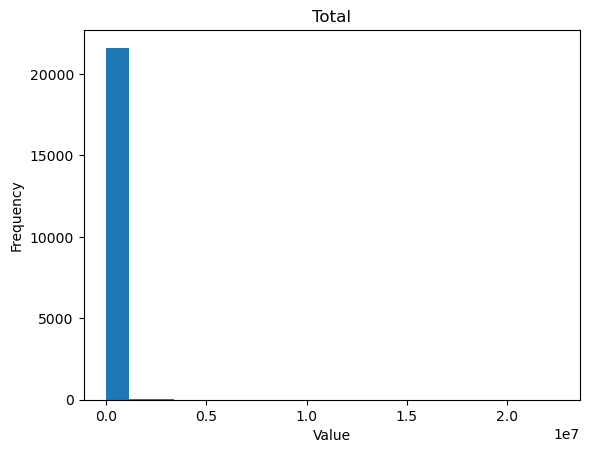

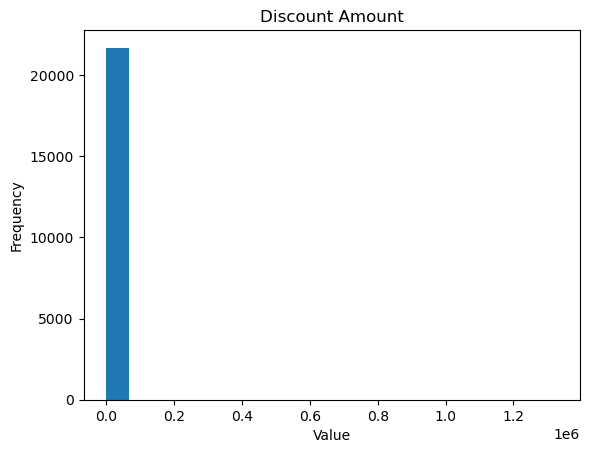

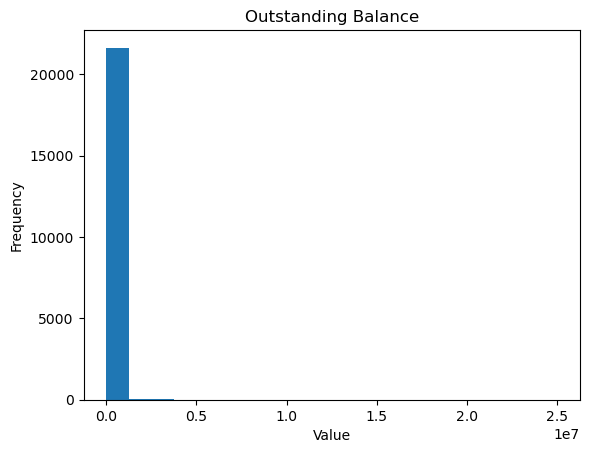

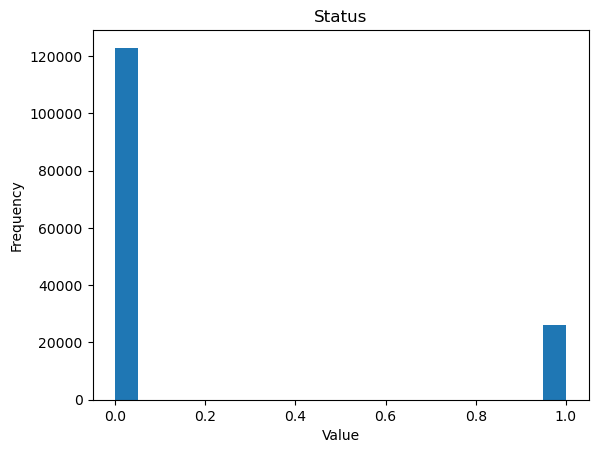

In [25]:
for col in df_num:
    plt.hist(df_drop[col], bins=20)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

                     Accepts Marketing     Total  Discount Amount  \
Accepts Marketing             1.000000 -0.027982        -0.117510   
Total                        -0.027982  1.000000         0.043223   
Discount Amount              -0.117510  0.043223         1.000000   
Outstanding Balance          -0.094992  0.207968         0.024670   
Status                             NaN       NaN              NaN   

                     Outstanding Balance  Status  
Accepts Marketing              -0.094992     NaN  
Total                           0.207968     NaN  
Discount Amount                 0.024670     NaN  
Outstanding Balance             1.000000     NaN  
Status                               NaN     NaN  


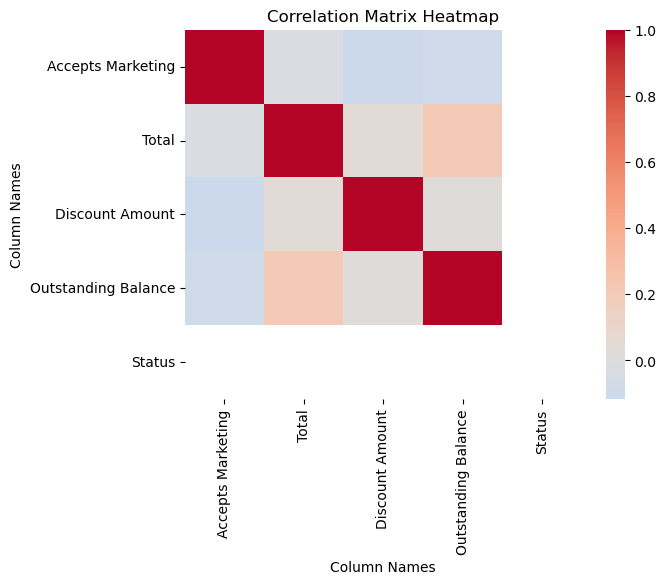

In [26]:
corr = df_final.corr()
print(corr)

# Create the heatmap
sns.heatmap(corr, cmap='coolwarm', center=0)

# Add title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Column Names')
plt.ylabel('Column Names')

# Display the plot
plt.show()

In [27]:
# Separating numerical and categorical features
df_num_final = df_drop.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_cat_final = df_drop.select_dtypes(include=['object']).columns.tolist()

# Printing the list of numerical and categorical features
print('Numerical features:', df_num_final)
print('Categorical features:', df_cat_final)

Numerical features: ['Accepts Marketing', 'Total', 'Discount Amount', 'Outstanding Balance', 'Status']
Categorical features: ['Email', 'Leads_Source', 'Sales owner', 'Team', 'Pcrtoduct_interested', 'Lead_State', 'Lead_city', 'page-url', 'Lead_hour', 'Vendor', 'Source']


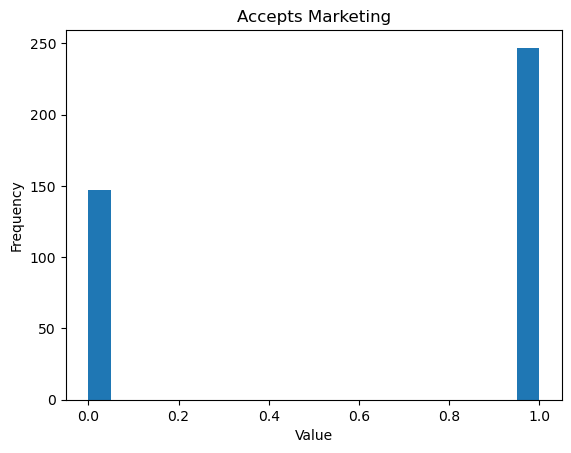

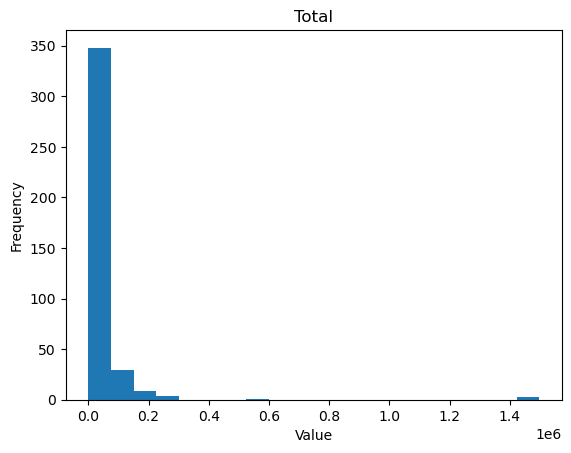

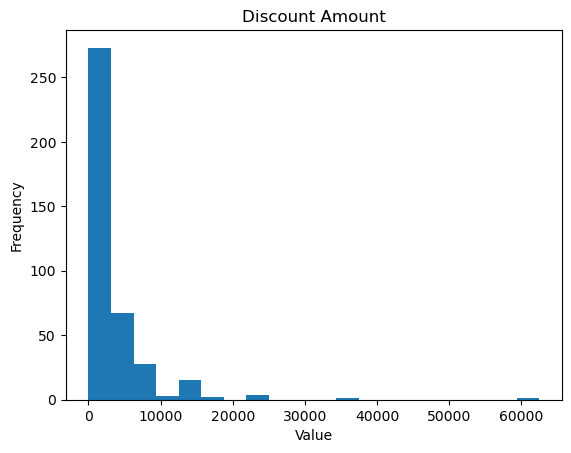

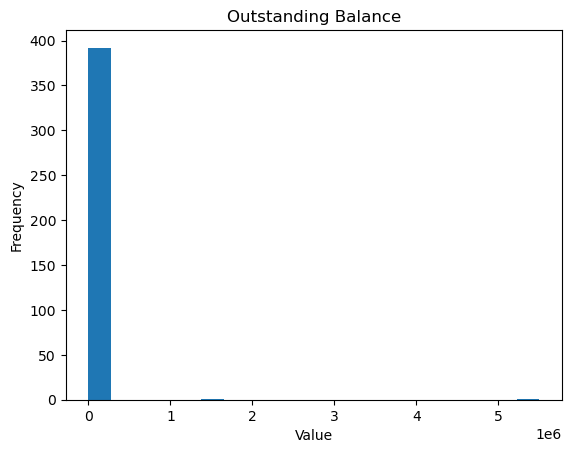

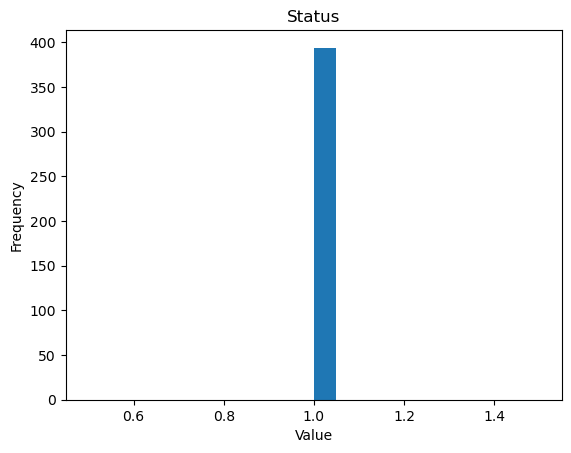

In [28]:
for col in df_num_final:
    plt.hist(df_final[col], bins=20)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# FEATURE ENGINEERING

In [29]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149032 entries, 0 to 149031
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Email                 144673 non-null  object 
 1   Leads_Source          149032 non-null  object 
 2   Sales owner           60435 non-null   object 
 3   Team                  60311 non-null   object 
 4   Pcrtoduct_interested  31642 non-null   object 
 5   Lead_State            99195 non-null   object 
 6   Lead_city             100793 non-null  object 
 7   page-url              15394 non-null   object 
 8   Lead_hour             149032 non-null  object 
 9   Accepts Marketing     21720 non-null   float64
 10  Total                 21720 non-null   float64
 11  Discount Amount       21720 non-null   float64
 12  Vendor                26057 non-null   object 
 13  Outstanding Balance   21720 non-null   float64
 14  Source                21720 non-null   object 
 15  

In [30]:
df_drop.isnull().sum()


Email                     4359
Leads_Source                 0
Sales owner              88597
Team                     88721
Pcrtoduct_interested    117390
Lead_State               49837
Lead_city                48239
page-url                133638
Lead_hour                    0
Accepts Marketing       127312
Total                   127312
Discount Amount         127312
Vendor                  122975
Outstanding Balance     127312
Source                  127312
Status                       0
dtype: int64

In [31]:
for col in df_drop.columns:
    print(col)
    print(df_drop[col].nunique())

Email
137321
Leads_Source
17
Sales owner
54
Team
3
Pcrtoduct_interested
99
Lead_State
173
Lead_city
7652
page-url
6413
Lead_hour
102490
Accepts Marketing
2
Total
4204
Discount Amount
3385
Vendor
2
Outstanding Balance
2636
Source
11
Status
2


In [32]:
df_drop_copy = df_drop.copy()

In [33]:
# Fill in missing values for Team, Product_interested, and page-url
df_drop_copy['Team'].fillna(df_drop['Team'].mode()[0], inplace=True)
df_drop_copy['Pcrtoduct_interested'].fillna('Unknown', inplace=True)
df_drop_copy['page-url'].fillna('Unknown', inplace=True)




# Replace missing values in the 'Accepts Marketing' column with the mode
df_drop_copy['Accepts Marketing'].fillna(df_drop_copy['Accepts Marketing'].mode()[0], inplace=True)

# Replace missing values in the 'Total' column with the mean
df_drop_copy['Total'].fillna(df_drop_copy['Total'].mean(), inplace=True)

# Replace missing values in the 'Discount Amount' column with the mean
df_drop_copy['Discount Amount'].fillna(df_drop_copy['Discount Amount'].mean(), inplace=True)

# Replace missing values in the 'Outstanding Balance' column with the mean
df_drop_copy['Outstanding Balance'].fillna(df_drop_copy['Outstanding Balance'].mean(), inplace=True)

# Replace missing values in the 'Vendor' column with the mode
df_drop_copy['Vendor'].fillna(df_drop_copy['Vendor'].mode()[0], inplace=True)

df_drop_copy['Source'].fillna(df_drop_copy['Source'].mode()[0], inplace=True)

# handling 'Email', 'Leads_Source', 'Sales owner', 'Lead_State', 'Lead_city'
df_drop_copy['Email'].fillna(df['Email'].mode()[0], inplace=True)
df_drop_copy['Leads_Source'].fillna(df['Leads_Source'].mode()[0], inplace=True)
df_drop_copy['Sales owner'].fillna(df['Sales owner'].mode()[0], inplace=True)
df_drop_copy['Lead_State'].fillna(df['Lead_State'].mode()[0], inplace=True)
df_drop_copy['Lead_city'].fillna(df['Lead_city'].mode()[0], inplace=True)





In [34]:
df_drop_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149032 entries, 0 to 149031
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Email                 149032 non-null  object 
 1   Leads_Source          149032 non-null  object 
 2   Sales owner           149032 non-null  object 
 3   Team                  149032 non-null  object 
 4   Pcrtoduct_interested  149032 non-null  object 
 5   Lead_State            149032 non-null  object 
 6   Lead_city             149032 non-null  object 
 7   page-url              149032 non-null  object 
 8   Lead_hour             149032 non-null  object 
 9   Accepts Marketing     149032 non-null  float64
 10  Total                 149032 non-null  float64
 11  Discount Amount       149032 non-null  float64
 12  Vendor                149032 non-null  object 
 13  Outstanding Balance   149032 non-null  float64
 14  Source                149032 non-null  object 
 15  

In [35]:
df_drop_copy.isnull().sum()

Email                   0
Leads_Source            0
Sales owner             0
Team                    0
Pcrtoduct_interested    0
Lead_State              0
Lead_city               0
page-url                0
Lead_hour               0
Accepts Marketing       0
Total                   0
Discount Amount         0
Vendor                  0
Outstanding Balance     0
Source                  0
Status                  0
dtype: int64

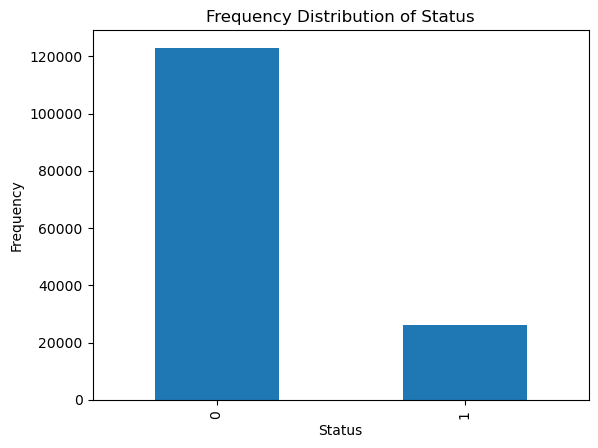

In [36]:
# Get the frequency count of each unique value in the 'Status' column
status_counts = df_drop_copy['Status'].value_counts()

# Plot the frequency distribution as a bar plot
status_counts.plot(kind='bar')

# Add axis labels and a title
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Status')

# Show the plot
plt.show()

# PERFORMING LABEL ENCODING


In [37]:
# Separating numerical and categorical features
df_num = df_drop_copy.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_cat = df_drop_copy.select_dtypes(include=['object']).columns.tolist()

# Categorical features: ['Email', 'Leads_Source', 'Sales owner', 'Team', 'Pcrtoduct_interested', 'Lead_State', 'Lead_city', 'page-url', 'Lead_hour', 'Vendor', 'Source']
print('Numerical features:', df_num)
print('Categorical features:', df_cat)

Numerical features: ['Accepts Marketing', 'Total', 'Discount Amount', 'Outstanding Balance', 'Status']
Categorical features: ['Email', 'Leads_Source', 'Sales owner', 'Team', 'Pcrtoduct_interested', 'Lead_State', 'Lead_city', 'page-url', 'Lead_hour', 'Vendor', 'Source']


In [38]:
# specify the features to label encode
features_to_encode = ['Email', 'Leads_Source', 'Sales owner', 'Team', 'Pcrtoduct_interested', 'Lead_State', 'Lead_city', 'page-url', 'Lead_hour', 'Vendor', 'Source']

# # perform one-hot encoding on the specified features
# df_encoded = pd.get_dummies(df_drop_copy, columns=features_to_encode)

# # print the encoded dataframe
# print(df_encoded.head())

from sklearn.preprocessing import LabelEncoder

# create an instance of the LabelEncoder class
le = LabelEncoder()

# perform label encoding on the specified features
for feature in features_to_encode:
    df_drop_copy[feature] = le.fit_transform(df_drop_copy[feature].astype(str))

# print the encoded dataframe
print(df_drop_copy.head())


   Email  Leads_Source  Sales owner  Team  Pcrtoduct_interested  Lead_State  \
0  39276            16           15     2                    70          92   
1  24521            16           15     2                    44         166   
2  13955            16           15     2                    95         107   
3  84886            14           15     2                    95         149   
4  78096            16           15     2                    95          92   

   Lead_city  page-url  Lead_hour  Accepts Marketing         Total  \
0       1009         0      87689                1.0  30221.925608   
1       3630         0      81678                1.0  30221.925608   
2       4767         0      52836                1.0  30221.925608   
3       5878         0      69941                0.0  17235.000000   
4       1009         0      60366                1.0  30221.925608   

   Discount Amount  Vendor  Outstanding Balance  Source  Status  
0      2619.813282       1         216

In [39]:
df_drop_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149032 entries, 0 to 149031
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Email                 149032 non-null  int64  
 1   Leads_Source          149032 non-null  int64  
 2   Sales owner           149032 non-null  int64  
 3   Team                  149032 non-null  int64  
 4   Pcrtoduct_interested  149032 non-null  int64  
 5   Lead_State            149032 non-null  int64  
 6   Lead_city             149032 non-null  int64  
 7   page-url              149032 non-null  int64  
 8   Lead_hour             149032 non-null  int64  
 9   Accepts Marketing     149032 non-null  float64
 10  Total                 149032 non-null  float64
 11  Discount Amount       149032 non-null  float64
 12  Vendor                149032 non-null  int64  
 13  Outstanding Balance   149032 non-null  float64
 14  Source                149032 non-null  int64  
 15  

In [40]:
df_drop_copy.isnull().sum()

Email                   0
Leads_Source            0
Sales owner             0
Team                    0
Pcrtoduct_interested    0
Lead_State              0
Lead_city               0
page-url                0
Lead_hour               0
Accepts Marketing       0
Total                   0
Discount Amount         0
Vendor                  0
Outstanding Balance     0
Source                  0
Status                  0
dtype: int64

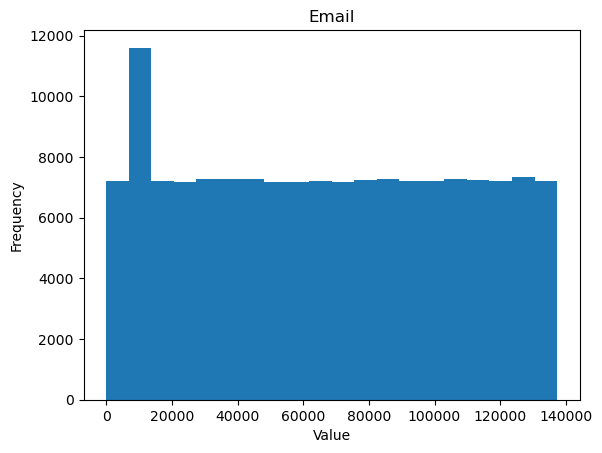

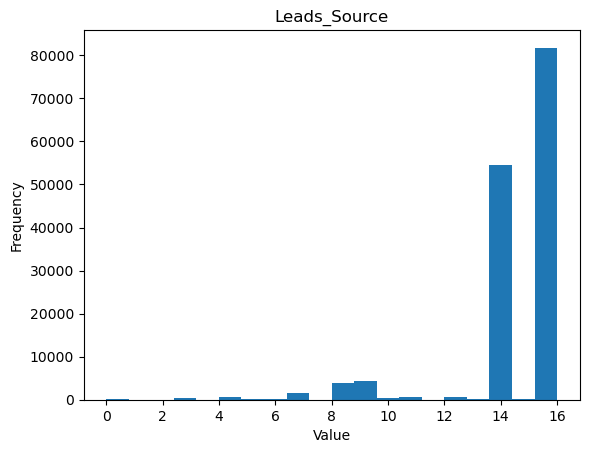

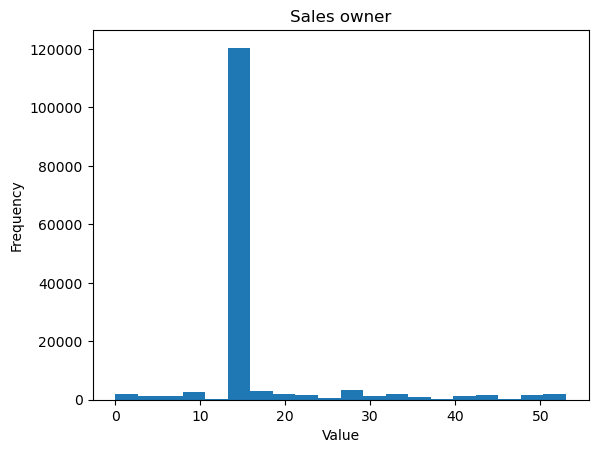

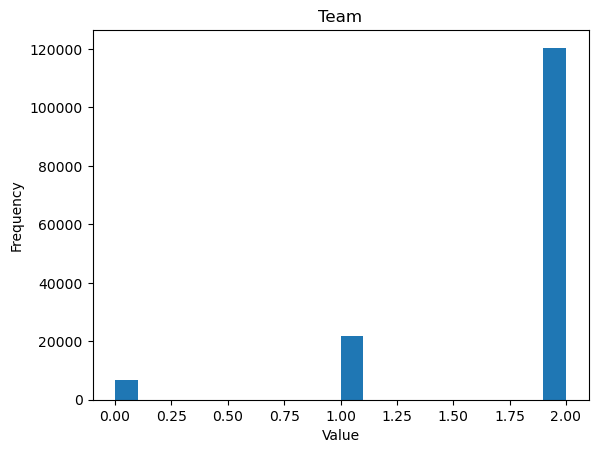

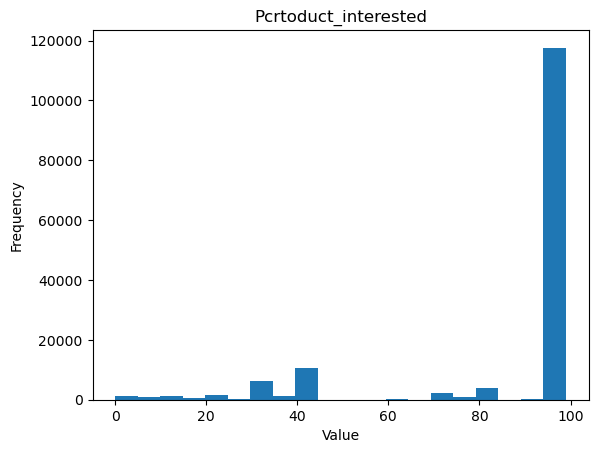

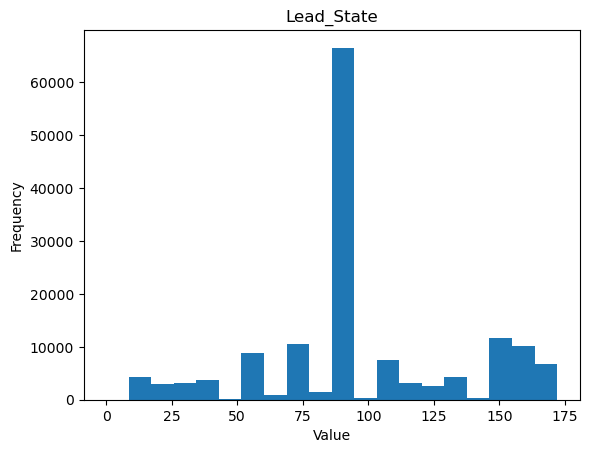

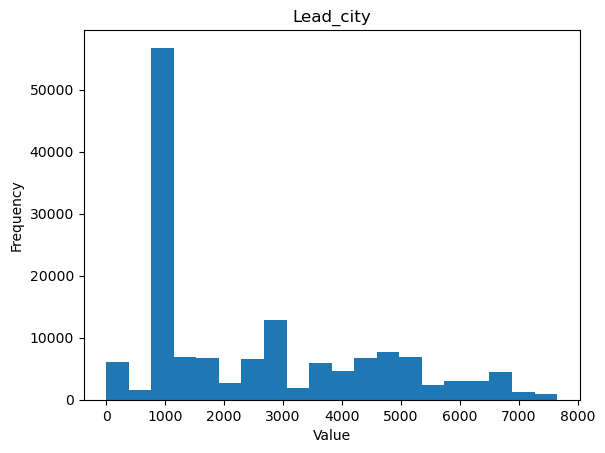

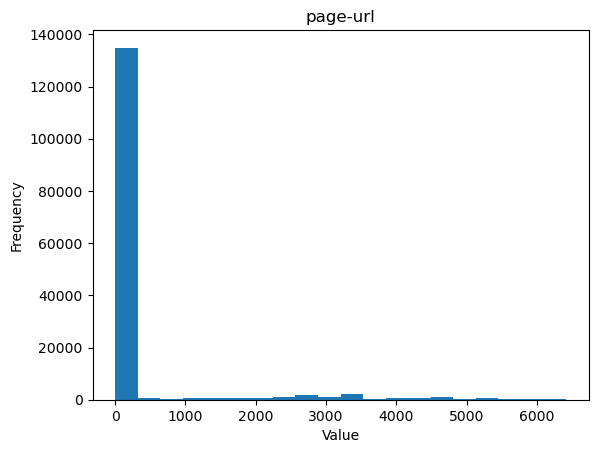

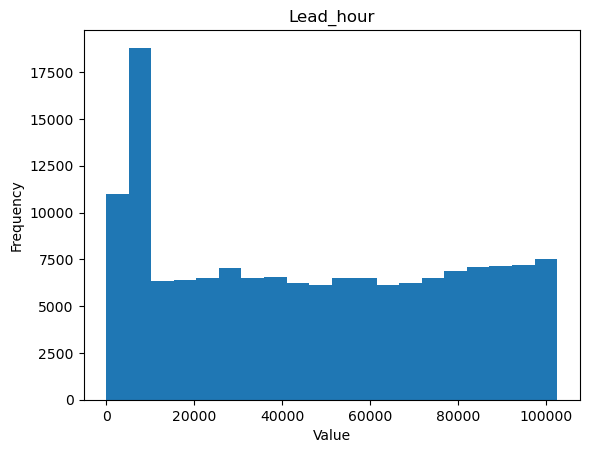

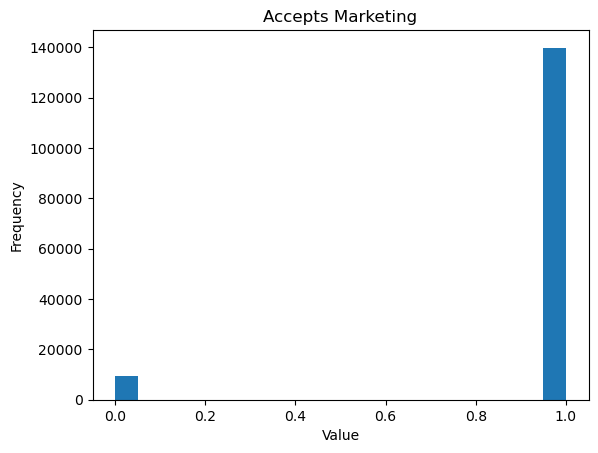

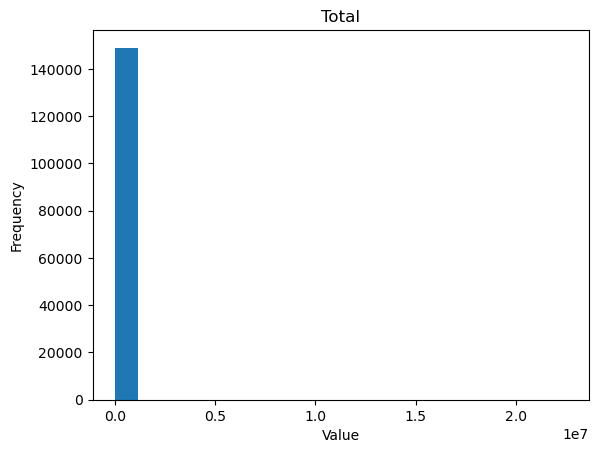

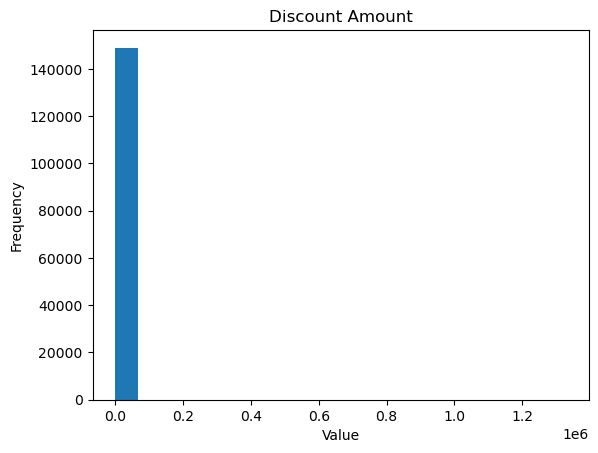

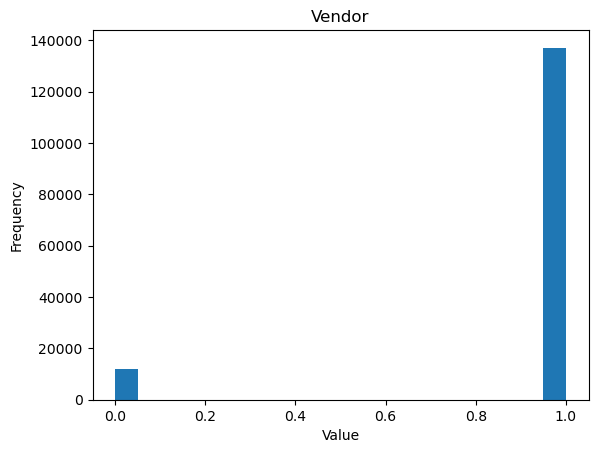

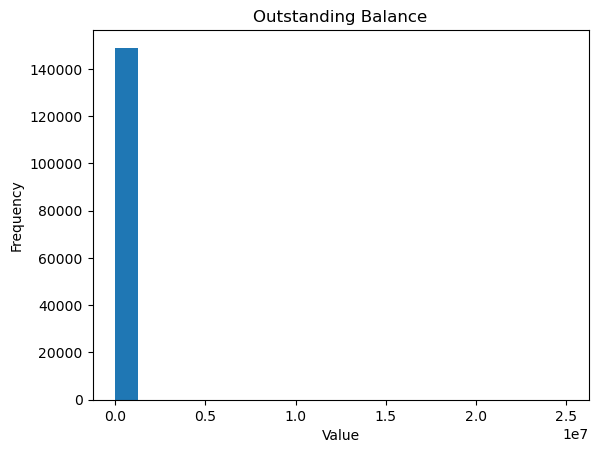

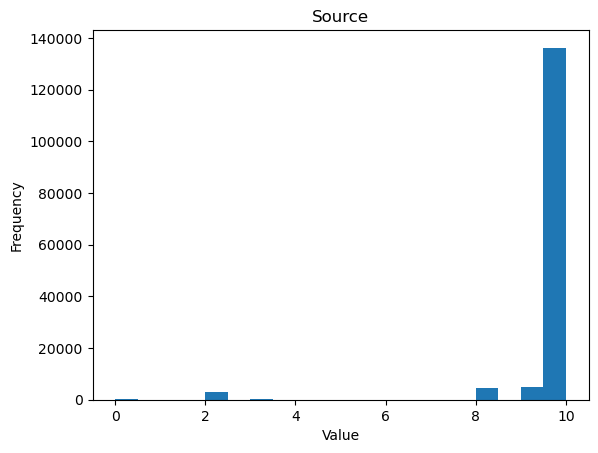

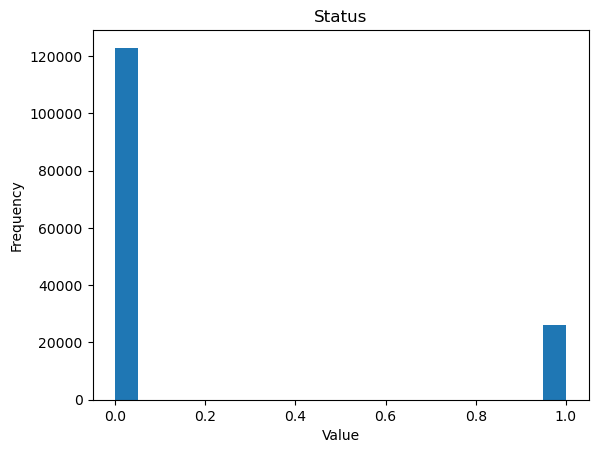

In [41]:
for col in df_drop_copy:
    plt.hist(df_drop_copy[col], bins=20)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# MODEL CREATION


In [42]:
# Separate the features from the target variable
X = df_drop_copy.drop(['Status'], axis=1)  # exclude the 'Status' column from features
y = df_drop_copy['Status']

In [43]:
X.shape

(149032, 15)

In [44]:
y.shape

(149032,)

**Random Forest**

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc2=RandomForestClassifier(n_estimators=1000, random_state=0)

# training
rfc2.fit(X_train,y_train)

# predict
y_pred = rfc2.predict(X_test)

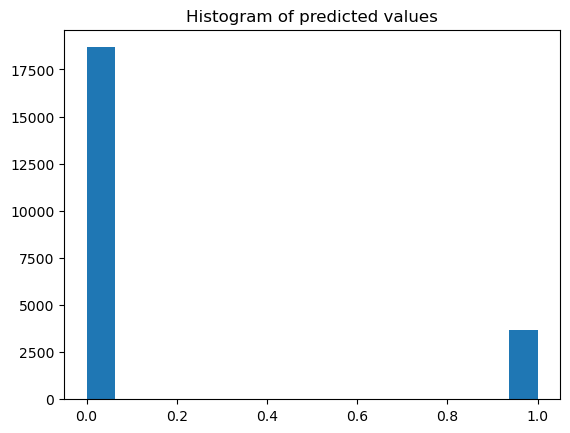

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# create histogram of predicted values
plt.hist(y_pred, bins='auto')
plt.title("Histogram of predicted values")
plt.show()

In [48]:
from sklearn.metrics import classification_report
y_pred = rfc2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18493
           1       0.99      0.94      0.97      3862

    accuracy                           0.99     22355
   macro avg       0.99      0.97      0.98     22355
weighted avg       0.99      0.99      0.99     22355



In [49]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9886378886155223


In [50]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9438114966338684


**Logistic Regression**

In [51]:
# Separate the features from the target variable
X = df_drop_copy.drop(['Status'], axis=1)  # exclude the 'Status' column from features
y = df_drop_copy['Status']

In [52]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [53]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90     18493
           1       0.38      0.04      0.07      3862

    accuracy                           0.82     22355
   macro avg       0.61      0.51      0.48     22355
weighted avg       0.75      0.82      0.76     22355



In [54]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8232162827108029


In [55]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.03676851372345935


**Decision Trees**

In [56]:
# DECISION TREES
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

DT2 = DecisionTreeClassifier(random_state=0)

# training
DT2 = DT2.fit(X_train,y_train)

# predictiong
y_pred = DT2.predict(X_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9819840976951723


In [58]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9442535318823979
Recall: 0.9528029281448661


**XG BOOST**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

import xgboost as xgb

# Create the model object
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# predictiong
y_pred = xgb_model.predict(X_test)

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9812795652028047
Precision: 0.9965702036441586
Recall: 0.8955885185898671


**Naive Bayes**

In [61]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Create a Naive Bayes classifier object
nb = GaussianNB()

# Fit the classifier on the training data
nb.fit(X_train, y_train)

# predictiong
y_pred = nb.predict(X_test)

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.969436709497769
Precision: 1.0
Recall: 0.824503949142747


# PERFORMING THE SAME FEATURE ENGINEERING IN EST DATA

In [63]:
estdf = est_df.copy()

In [64]:
estdf.isnull().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
Email                    1889
Leads_Source                0
Work email              63872
Job title               63872
Sales owner             37967
Owner Email             37967
Territory               60451
Team                    38011
Pcrtoduct_interested    50346
Lead_Zipcode            21081
Lead_State              21350
Lead_city               20731
url-campaign            63872
page-url                57247
Lead_hour                   0
Fulfillment Status      54524
Fulfilled at            55203
Accepts Marketing       54524
Shipping                54524
Total                   54524
Discount Amount         54524
Payment Method          54546
Refunded Amount         54524
Vendor                  52671
Outstanding Balance     54524
Source                  54524
ID                          0
dtype: int64

In [65]:
estdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63872 entries, 0 to 63871
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            63872 non-null  int64  
 1   Unnamed: 0.1          63872 non-null  int64  
 2   Email                 61983 non-null  object 
 3   Leads_Source          63872 non-null  object 
 4   Work email            0 non-null      float64
 5   Job title             0 non-null      float64
 6   Sales owner           25905 non-null  object 
 7   Owner Email           25905 non-null  object 
 8   Territory             3421 non-null   object 
 9   Team                  25861 non-null  object 
 10  Pcrtoduct_interested  13526 non-null  object 
 11  Lead_Zipcode          42791 non-null  object 
 12  Lead_State            42522 non-null  object 
 13  Lead_city             43141 non-null  object 
 14  url-campaign          0 non-null      float64
 15  page-url           

In [66]:
print(estdf.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Email', 'Leads_Source', 'Work email',
       'Job title', 'Sales owner', 'Owner Email', 'Territory', 'Team',
       'Pcrtoduct_interested', 'Lead_Zipcode', 'Lead_State', 'Lead_city',
       'url-campaign', 'page-url', 'Lead_hour', 'Fulfillment Status',
       'Fulfilled at', 'Accepts Marketing', 'Shipping', 'Total',
       'Discount Amount', 'Payment Method', 'Refunded Amount', 'Vendor',
       'Outstanding Balance', 'Source', 'ID'],
      dtype='object')


In [67]:
estdf_copy=estdf.copy()
estdf_copy = estdf_copy.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Work email', 'Job title', 'Owner Email', 'Lead_Zipcode', 'Territory', 'Fulfillment Status', 'Fulfilled at', 'Shipping', 'ID', 'Payment Method', 'Refunded Amount', 'url-campaign'], axis=1)



# Fill in missing values for Team, Product_interested, and page-url
estdf_copy['Team'].fillna(estdf_copy['Team'].mode()[0], inplace=True)
estdf_copy['Pcrtoduct_interested'].fillna('Unknown', inplace=True)
estdf_copy['page-url'].fillna('Unknown', inplace=True)




# Replace missing values in the 'Accepts Marketing' column with the mode
estdf_copy['Accepts Marketing'].fillna(estdf_copy['Accepts Marketing'].mode()[0], inplace=True)

# Replace missing values in the 'Total' column with the mean
estdf_copy['Total'].fillna(estdf_copy['Total'].mean(), inplace=True)

# Replace missing values in the 'Discount Amount' column with the mean
estdf_copy['Discount Amount'].fillna(estdf_copy['Discount Amount'].mean(), inplace=True)

# Replace missing values in the 'Outstanding Balance' column with the mean
estdf_copy['Outstanding Balance'].fillna(estdf_copy['Outstanding Balance'].mean(), inplace=True)

# Replace missing values in the 'Vendor' column with the mode
estdf_copy['Vendor'].fillna(estdf_copy['Vendor'].mode()[0], inplace=True)

estdf_copy['Source'].fillna(estdf_copy['Source'].mode()[0], inplace=True)

# handling 'Email', 'Leads_Source', 'Sales owner', 'Lead_State', 'Lead_city'
estdf_copy['Email'].fillna(estdf['Email'].mode()[0], inplace=True)
estdf_copy['Leads_Source'].fillna(estdf_copy['Leads_Source'].mode()[0], inplace=True)
estdf_copy['Sales owner'].fillna(estdf_copy['Sales owner'].mode()[0], inplace=True)
estdf_copy['Lead_State'].fillna(estdf_copy['Lead_State'].mode()[0], inplace=True)
estdf_copy['Lead_city'].fillna(estdf_copy['Lead_city'].mode()[0], inplace=True)


# specify the features to label encode
features_to_encode = ['Email', 'Leads_Source', 'Sales owner', 'Team', 'Pcrtoduct_interested', 'Lead_State', 'Lead_city', 'page-url', 'Lead_hour', 'Vendor', 'Source']

from sklearn.preprocessing import LabelEncoder

# create an instance of the LabelEncoder class
le = LabelEncoder()

# perform label encoding on the specified features
for feature in features_to_encode:
    estdf_copy[feature] = le.fit_transform(estdf_copy[feature].astype(str))



In [68]:
estdf_copy.isnull().sum()

Email                   0
Leads_Source            0
Sales owner             0
Team                    0
Pcrtoduct_interested    0
Lead_State              0
Lead_city               0
page-url                0
Lead_hour               0
Accepts Marketing       0
Total                   0
Discount Amount         0
Vendor                  0
Outstanding Balance     0
Source                  0
dtype: int64

In [69]:
estdf_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63872 entries, 0 to 63871
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 63872 non-null  int64  
 1   Leads_Source          63872 non-null  int64  
 2   Sales owner           63872 non-null  int64  
 3   Team                  63872 non-null  int64  
 4   Pcrtoduct_interested  63872 non-null  int64  
 5   Lead_State            63872 non-null  int64  
 6   Lead_city             63872 non-null  int64  
 7   page-url              63872 non-null  int64  
 8   Lead_hour             63872 non-null  int64  
 9   Accepts Marketing     63872 non-null  float64
 10  Total                 63872 non-null  float64
 11  Discount Amount       63872 non-null  float64
 12  Vendor                63872 non-null  int64  
 13  Outstanding Balance   63872 non-null  float64
 14  Source                63872 non-null  int64  
dtypes: float64(4), int6

# Submissions

In [70]:
# predict
y_pred_test = nb.predict(estdf_copy)

# y_new_pred = rfc2.predict(estdf_copy)

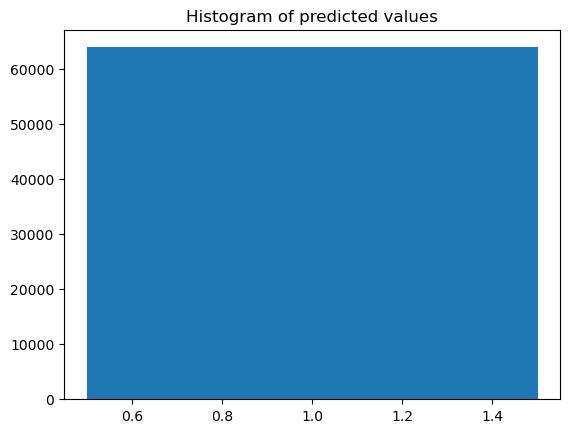

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# create histogram of predicted values
plt.hist(y_pred_test, bins='auto')
plt.title("Histogram of predicted values")
plt.show()

In [72]:
# Create a new DataFrame with only ID_column and predicted values
submission4_naivebayes = pd.DataFrame({'ID': estdf['ID'], 'Status': y_pred_test})

# Print the output
print(submission4_naivebayes)

# Save the output as a CSV file
# submission4_naivebayes.to_csv('submission4_naivebayes.csv', index=False)
# 


                                         ID  Status
0      7a1c9aae-e9d1-4c8a-ab5b-3561d383abc9       1
1      fd301379-2649-4974-b5de-1fcb1b5510bb       1
2      d0b958f4-87c4-4ca0-afe5-1acdfc15b6ce       1
3      19430ad6-b461-4790-b26b-4b97e3973dec       1
4      d999f31e-8106-44b5-a648-ac9718925187       1
...                                     ...     ...
63867  c06df9c8-de2d-4e2c-a82c-1a5a7bb3d3b3       1
63868  873fb54c-67f5-43bd-b0c7-4ef960e988dd       1
63869  1e37f9f0-32c4-446a-b528-c0a5820c59fb       1
63870  205c02a0-64fe-463d-8dbb-7f4ca234bd1d       1
63871  a2867d7b-f94b-46e4-a344-0360f8777272       1

[63872 rows x 2 columns]


# Normalization


In [73]:
df_drop_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149032 entries, 0 to 149031
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Email                 149032 non-null  int64  
 1   Leads_Source          149032 non-null  int64  
 2   Sales owner           149032 non-null  int64  
 3   Team                  149032 non-null  int64  
 4   Pcrtoduct_interested  149032 non-null  int64  
 5   Lead_State            149032 non-null  int64  
 6   Lead_city             149032 non-null  int64  
 7   page-url              149032 non-null  int64  
 8   Lead_hour             149032 non-null  int64  
 9   Accepts Marketing     149032 non-null  float64
 10  Total                 149032 non-null  float64
 11  Discount Amount       149032 non-null  float64
 12  Vendor                149032 non-null  int64  
 13  Outstanding Balance   149032 non-null  float64
 14  Source                149032 non-null  int64  
 15  

In [74]:
df_norm=df_drop_copy.copy()

In [75]:
from sklearn.preprocessing import StandardScaler

# Define the columns to be normalized
cols_to_normalize = ['Accepts Marketing', 'Total', 'Discount Amount', 'Outstanding Balance']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
df_drop_copy[cols_to_normalize] = scaler.fit_transform(df_drop_copy[cols_to_normalize])


In [76]:
# NORMALISING ALL COLUMNS

from sklearn.preprocessing import StandardScaler

# Select the columns to be normalized
cols_to_normalize2 = ['Email', 'Leads_Source', 'Sales owner', 'Team', 'Pcrtoduct_interested', 'Lead_State', 'Lead_city', 'page-url', 'Lead_hour', 'Accepts Marketing', 'Total', 'Discount Amount', 'Vendor', 'Outstanding Balance', 'Source']

# Create the scaler object
scaler2 = StandardScaler()

# Fit and transform the selected columns
df_norm[cols_to_normalize2] = scaler2.fit_transform(df_norm[cols_to_normalize2])


In [77]:
# Separate the features from the target variable
X = df_drop_copy.drop(['Status'], axis=1)  # exclude the 'Status' column from features
y = df_drop_copy['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

from sklearn.linear_model import LogisticRegression
model_norm = LogisticRegression()
model_norm.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [78]:
# NORMALISING ALL COLUMNS

# Separate the features from the target variable
X = df_norm.drop(['Status'], axis=1)  # exclude the 'Status' column from features
y = df_norm['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

from sklearn.linear_model import LogisticRegression
model_norm = LogisticRegression()
model_norm.fit(X_train, y_train)

LogisticRegression()

In [79]:
from sklearn.metrics import classification_report
y_pred = model_norm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18493
           1       1.00      0.79      0.88      3862

    accuracy                           0.96     22355
   macro avg       0.98      0.89      0.93     22355
weighted avg       0.97      0.96      0.96     22355



In [80]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9634980988593156
Recall: 0.7887105126877265


In [81]:
# NORMALIZING ALL COLUMNS

from sklearn.metrics import classification_report
y_pred = model_norm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18493
           1       1.00      0.79      0.88      3862

    accuracy                           0.96     22355
   macro avg       0.98      0.89      0.93     22355
weighted avg       0.97      0.96      0.96     22355



In [82]:
# NORMALISING ALL COLUMNS
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9634980988593156
Recall: 0.7887105126877265


**Submission Norm**

In [83]:
# predict
y_pred_test = model_norm.predict(estdf_copy)

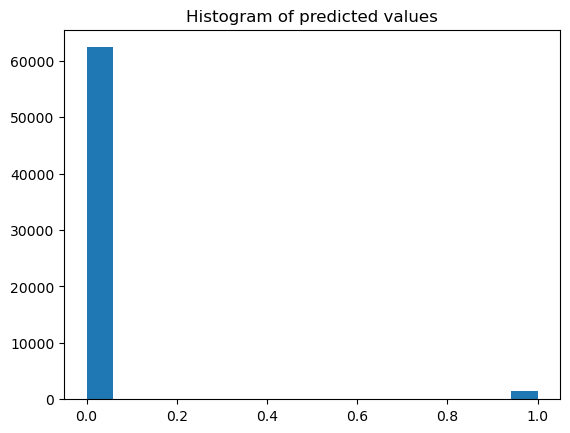

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# create histogram of predicted values
plt.hist(y_pred_test, bins='auto')
plt.title("Histogram of predicted values")
plt.show()

In [85]:
# Create a new DataFrame with only ID_column and predicted values
submission6_norm = pd.DataFrame({'ID': estdf['ID'], 'Status': y_pred_test})

# Print the output
print(submission6_norm)

# Save the output as a CSV file
# submission5_norm.to_csv('submission6_norm.csv', index=False)


                                         ID  Status
0      7a1c9aae-e9d1-4c8a-ab5b-3561d383abc9       0
1      fd301379-2649-4974-b5de-1fcb1b5510bb       0
2      d0b958f4-87c4-4ca0-afe5-1acdfc15b6ce       0
3      19430ad6-b461-4790-b26b-4b97e3973dec       0
4      d999f31e-8106-44b5-a648-ac9718925187       0
...                                     ...     ...
63867  c06df9c8-de2d-4e2c-a82c-1a5a7bb3d3b3       0
63868  873fb54c-67f5-43bd-b0c7-4ef960e988dd       0
63869  1e37f9f0-32c4-446a-b528-c0a5820c59fb       0
63870  205c02a0-64fe-463d-8dbb-7f4ca234bd1d       0
63871  a2867d7b-f94b-46e4-a344-0360f8777272       0

[63872 rows x 2 columns]


In [86]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

# # Select the features to one-hot encode
# features = ['Email', 'Leads_Source', 'Sales owner', 'Team', 'Pcrtoduct_interested', 'Lead_State', 'Lead_city', 'page-url', 'Lead_hour', 'Vendor', 'Source']

# # One-hot encode the features and drop the original columns
# df_drop = pd.get_dummies(df, columns=features, drop_first=True)

# # Drop any remaining rows with missing values
# df_drop.dropna(inplace=True)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df_drop.drop('Status', axis=1), df_drop['Status'], test_size=0.2, random_state=42)

# # Train a logistic regression model on the training data
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Evaluate the model on the testing data
# y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))

how to ignore id column while creating a ml mode without dropping the column